# San Diego accidents and violation


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['e', 'f']
`%matplotlib` prevents importing * from pylab and numpy



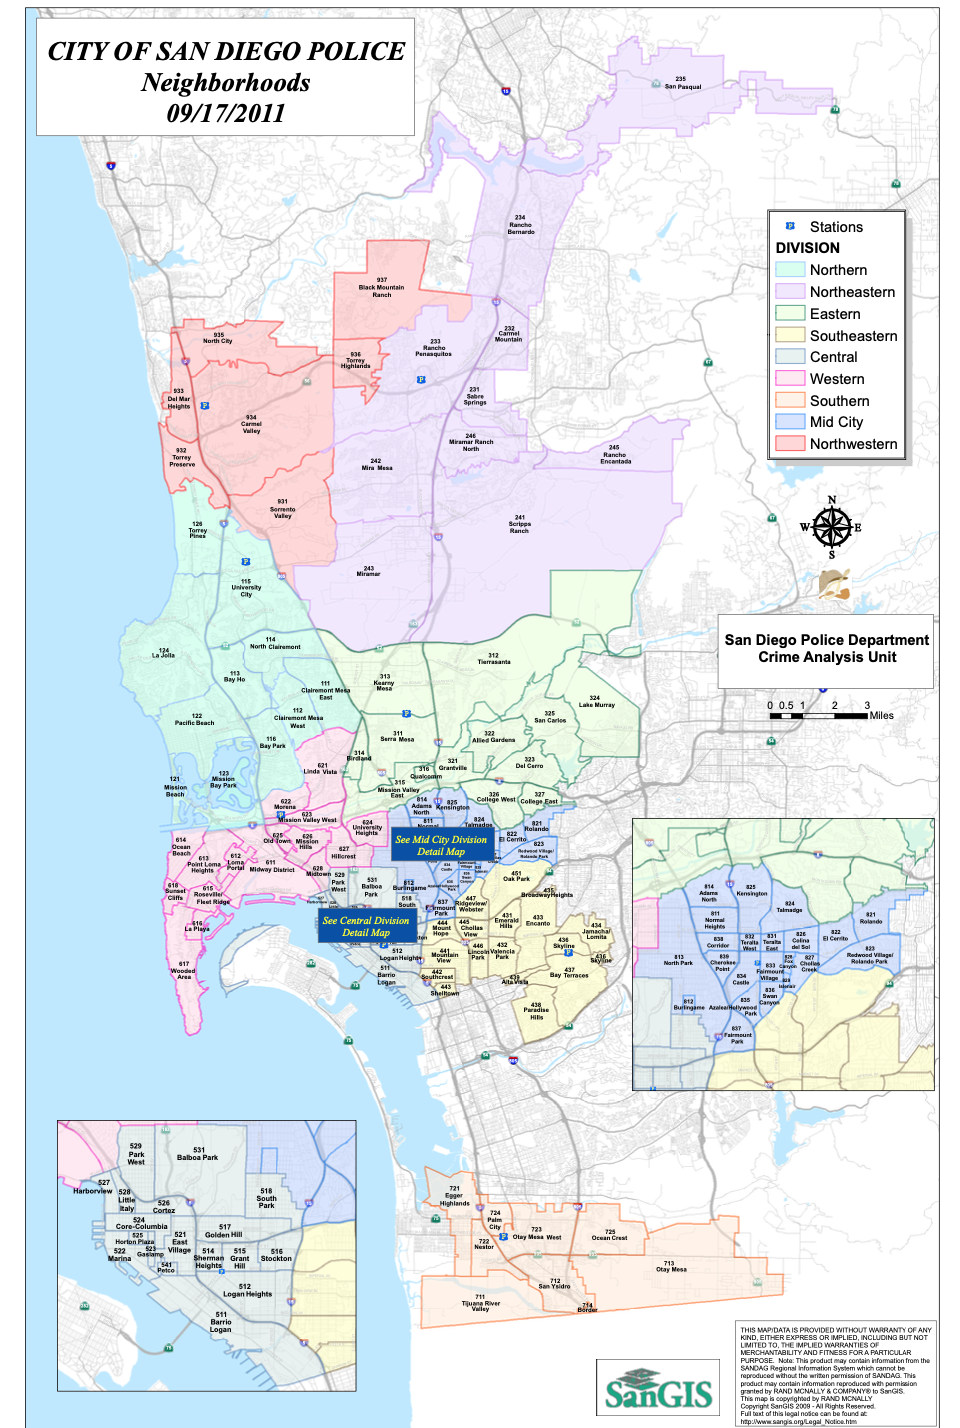

In [668]:
%pylab inline
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# https://www.sandiego.gov/sites/default/files/legacy/police/pdf/2011policecitywidemap.pdf



from IPython.display import Image
Image(filename='Screen Shot 2019-11-25 at 3.35.41 AM.png')

In [669]:
data = pd.read_csv('pd_collisions_datasd_v1.csv')
geo=pd.read_csv('geocoded_pd_collisions_dataset.csv')
geo.head(3)

,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,...,accident_month,hour,time,day_of_week_name,full_address,latitude,longitude,location,point,altitude
0,170082,2017-01-01 00:01:00,935,5500,NaN,VALERIO,TRAIL,NaN,NaN,NaN,...,1,0,00:01:00,SAT,"5500 VALERIO TRAIL, SAN DIEGO, CALIFORNIA, USA",32.962330,-117.201447,"5500, Valerio Trail, Pacific Highlands Ranch, ...","(32.96233, -117.201447, 0.0)",0.0
1,170166,2017-01-01 00:01:00,124,8300,NaN,CAM DEL ORO,NaN,NaN,NaN,NaN,...,1,0,00:01:00,SAT,"8300 CAM DEL ORO , SAN DIEGO, CALIFORNIA, USA",NaN,NaN,NaN,NaN,NaN
2,170101,2017-01-01 00:01:00,322,6400,NaN,CRAWFORD,STREET,NaN,NaN,NaN,...,1,0,00:01:00,SAT,"6400 CRAWFORD STREET, SAN DIEGO, CALIFORNIA, USA",32.789919,-117.093968,"6400, Crawford Street, Grantville, San Diego, ...","(32.789919, -117.093968, 0.0)",0.0


In [670]:
data.head(3)



,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,170082,2017-01-01 00:01:00,935,5500,,VALERIO,TRAIL,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,170166,2017-01-01 00:01:00,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
2,170101,2017-01-01 00:01:00,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR


In [671]:
data["date_time"]=data["date_time"].map(pd.to_datetime)

def get_day_month(dt):
    return dt.day

data["dom"]=data["date_time"].map(get_day_month)

def get_weekday(dt):
    return dt.weekday()
data["weekday"]=data["date_time"].map(get_weekday)


def get_month(dt):
    return dt.month
data["month"]=data['date_time'].map(get_month)

# Number of violation per month 

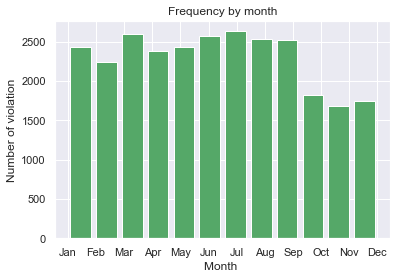

In [672]:
hist(data['month'],bins=12,rwidth=0.8 ,color="g")

xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
xlabel('Month ')
ylabel('Number of violation')
title('Frequency by month');

Number of the violation per police beat (teritory)

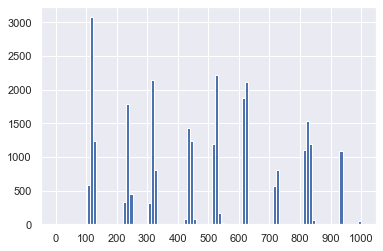

In [673]:
def count_rows(rows):
    return len(rows)

by_police = data.groupby('police_beat').apply(count_rows)



plt.hist(data['police_beat'],bins=100);
xticks([0,100,200,300,400,500,600,700,800,900,1000]);



In [700]:
e= data['police_beat'].value_counts()
f=pd.DataFrame({'Police beat':e.index, 'Total violation':e.values})
highest=f.iloc[:11,1:2]
police_code = {'code':[122,313,813,242,124,521,115,627,315,611,524],
                'city':['Pacific Beach','Kearny Mesa','North Park','Mira Mesa','La Jolla','East Vilage','University City','Hill Crest','Mission Valley','Midway District','Core Culmbia']}
highest_percentage = pd.DataFrame(police_code)
highest_percentage['Total Violation']=highest
highest_percentage



,code,city,Total Violation
0,122,Pacific Beach,1446
1,313,Kearny Mesa,883
2,813,North Park,835
3,242,Mira Mesa,827
4,124,La Jolla,763
5,521,East Vilage,689
6,115,University City,639
7,627,Hill Crest,638
8,315,Mission Valley,626
9,611,Midway District,622


## we see below the 11 highest cities having violation

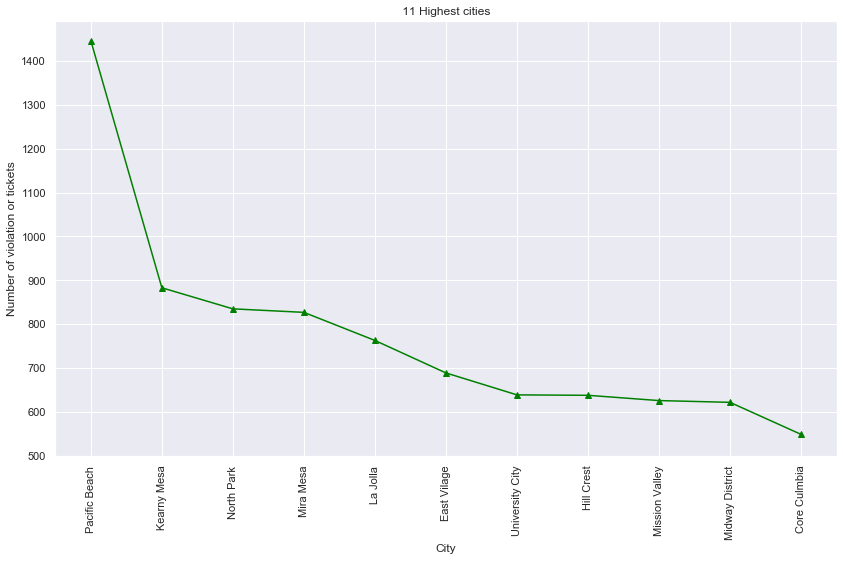

In [791]:
figure(figsize=(14,8))
plot(highest_percentage['Total Violation'],color='green',marker='^')
xticks(range(0,11),highest_percentage['city'])
yticks(range(500,1500,100))
plt.xticks(rotation=90)
xlabel('City')
ylabel('Number of violation or tickets')
title(" 11 Highest cities ");



In [792]:
data['address_sfx_primary'].value_counts()
d=pd.DataFrame({ 'place':['STREET','AVENUE','ROAD','BOULEVARD','DRIVE','Missing information','WAY','PARKWAY','PLACE','COURT','HIGHWAY','LANE','CIRCLE','WALK','MALL','PLAZA','ROW','TERRACE','TRAIL','SQUARE','POINT','DRIVEWAY','COVE','RAMP','PASEO','PATH','ALLEY','CRESCENT','LIGHTS','KNOLLS' ]
,'Num_violation':[7223,6744,3721,3377,3252,1599,389,303,213,202,142,113,103,61,36,33,13,10,6,5,4,3,3,3,3,1,1,1,1,1]  
})



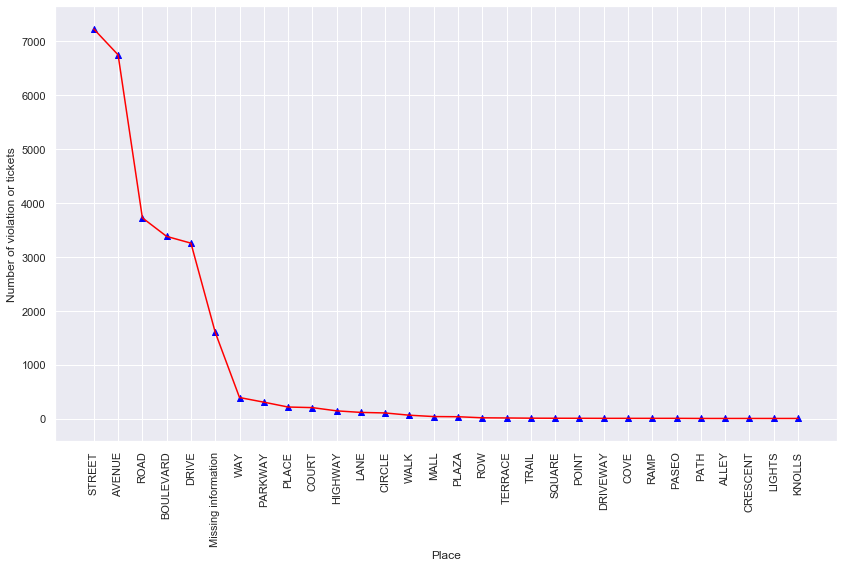

In [765]:
figure(figsize=(14,8))
xticks(range(0,30),d['place'])
plot(d['Num_violation'],color='red')
plt.xticks(rotation=90)
xlabel('Place')
ylabel('Number of violation or tickets')
scatter(d['place'],
d['Num_violation'], color='blue', marker='^');


In [379]:
# violation type
data['violation_type'].value_counts()

VC    27535
ZZ       13
MC       11
CO        6
PC        3
HS        2
Name: violation_type, dtype: int64

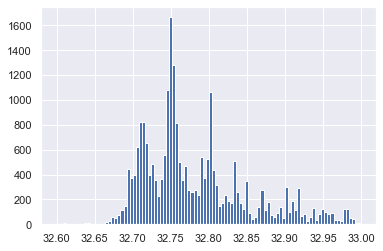

In [386]:
hist(geo['latitude'],bins=100,range=(32.6,33));

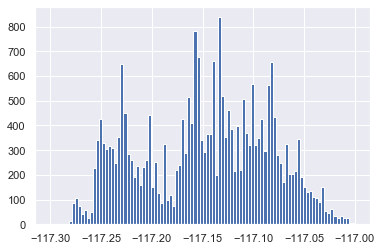

In [392]:
hist(geo['longitude'],bins=100,range=(-117.3,-117));

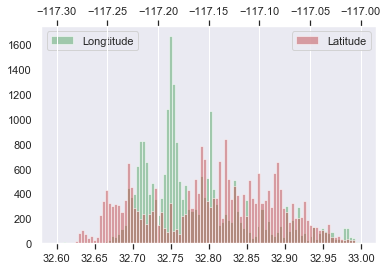

In [402]:
hist(geo['latitude'],bins=100,range=(32.6,33),color='g',alpha=0.5,label='Longtitude')

grid()
legend(loc='upper left')


twiny()

hist(geo['longitude'],bins=100,range=(-117.3,-117),color='r',alpha=0.5,label='Latitude');
legend(loc='best')

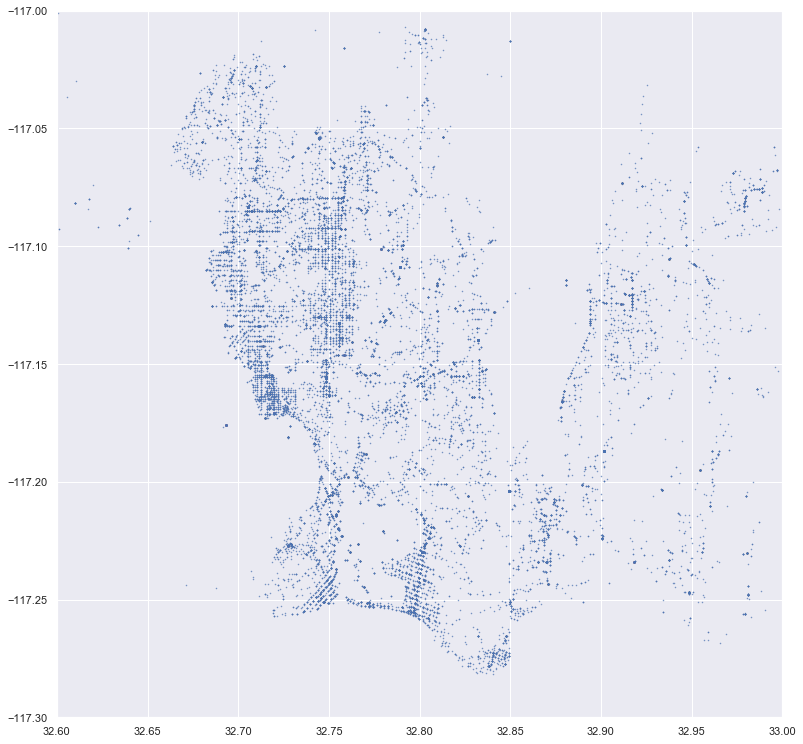

In [594]:
figure(figsize=(13,13))
plot(geo['latitude'],geo['longitude'],'.',ms=1,alpha=0.8,color='b')
xlim(32.6,33)
ylim(-117.3,-117.0);
